# Customer Segmentation Project

Step 1. Upload Dataset

In [27]:
from google.colab import files
uploaded = files.upload()  # Upload Mall_Customers.csv manually


Saving Mall_Customers.csv to Mall_Customers (2).csv


Step 2. Import Libraries

In [28]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Plot style
sns.set(style="whitegrid")


Step 3. Load and Inspect Data

In [29]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
df.head()


Shape: (200, 5)

Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Step 4. Basic EDA (Exploratory Data Analysis)

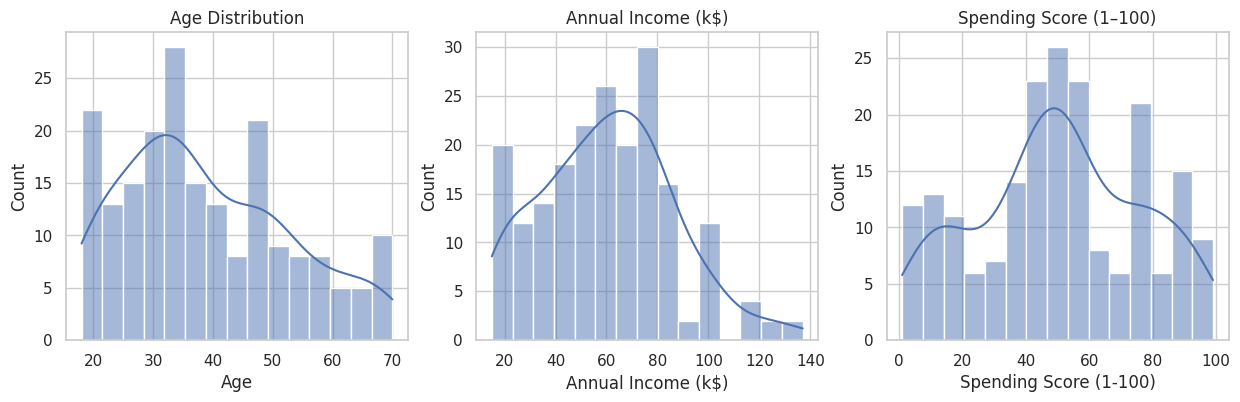

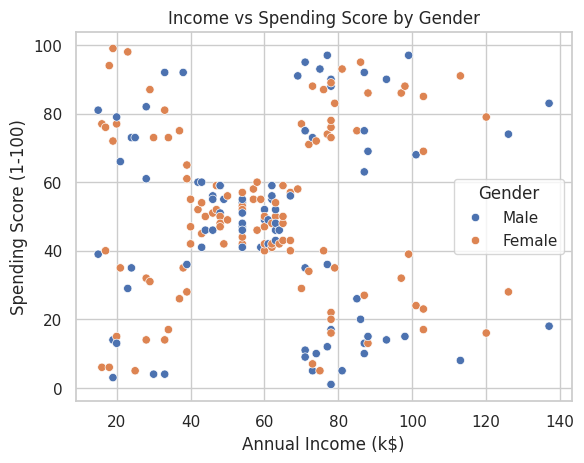

In [30]:
# Quick statistical summary
df.describe(include='all')

# Visualize distributions
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['Age'], bins=15, kde=True, ax=axs[0])
axs[0].set_title("Age Distribution")

sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, ax=axs[1])
axs[1].set_title("Annual Income (k$)")

sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, ax=axs[2])
axs[2].set_title("Spending Score (1–100)")
plt.show()

# Income vs Spending scatter
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Income vs Spending Score by Gender")
plt.show()


Step 5. Data Preprocessing

In [31]:
# Encode Gender
le = LabelEncoder()
df['Gender_enc'] = le.fit_transform(df['Gender'])

# Select features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_enc']
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data scaled and ready for clustering.")


Data scaled and ready for clustering.


Step 6. Finding the Optimal Number of Clusters (k)

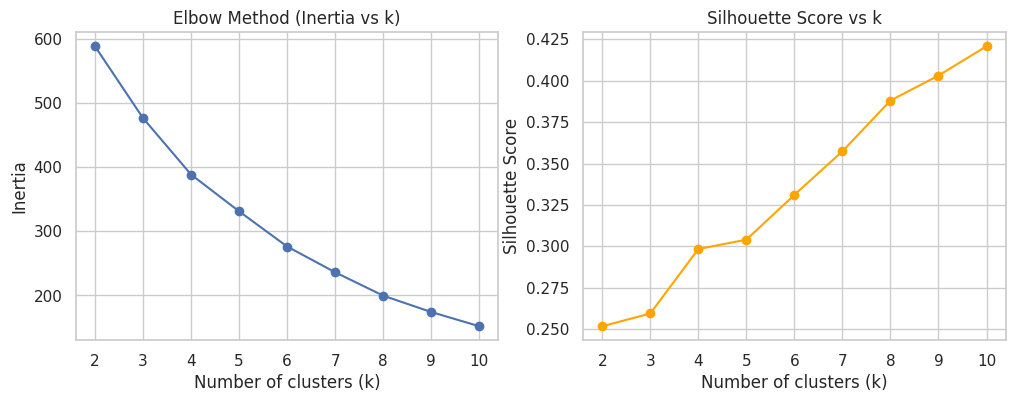

✅ Best number of clusters (k): 10


In [32]:
inertias, silhouettes, ks = [], [], range(2, 11)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# Plot elbow and silhouette
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(ks, inertias, marker='o')
axs[0].set_title("Elbow Method (Inertia vs k)")
axs[0].set_xlabel("Number of clusters (k)")
axs[0].set_ylabel("Inertia")

axs[1].plot(ks, silhouettes, marker='o', color='orange')
axs[1].set_title("Silhouette Score vs k")
axs[1].set_xlabel("Number of clusters (k)")
axs[1].set_ylabel("Silhouette Score")

plt.show()

best_k = ks[np.argmax(silhouettes)]
print("✅ Best number of clusters (k):", best_k)


Step 7. Fit KMeans Model and Add Cluster Labels

In [33]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_enc,Cluster
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,8
4,5,Female,31,17,40,0,2


Step 8. Visualize Clusters (2D PCA Projection)

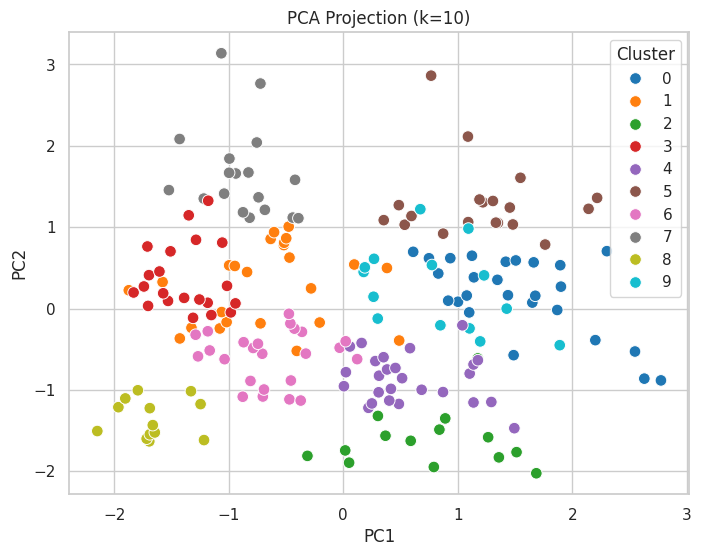

In [34]:
pca = PCA(n_components=2, random_state=42)
pca_proj = pca.fit_transform(X_scaled)
df['PC1'] = pca_proj[:, 0]
df['PC2'] = pca_proj[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=70)
plt.title(f"PCA Projection (k={best_k})")
plt.show()


Step 9. Analyze & Profile Each Cluster

Cluster Profiles:



,Age,Annual Income (k$),Spending Score (1-100),Count,Percentage
Cluster,,,,,
0,58.85,48.69,39.85,26,13.0
1,25.25,41.25,60.92,24,12.0
2,41.21,26.07,20.14,14,7.0
3,32.19,86.05,81.67,21,10.5
4,54.15,54.23,48.96,26,13.0
5,38.47,85.89,14.21,19,9.5
6,27.96,57.36,47.12,25,12.5
7,33.28,87.11,82.67,18,9.0
8,25.46,25.69,80.54,13,6.5


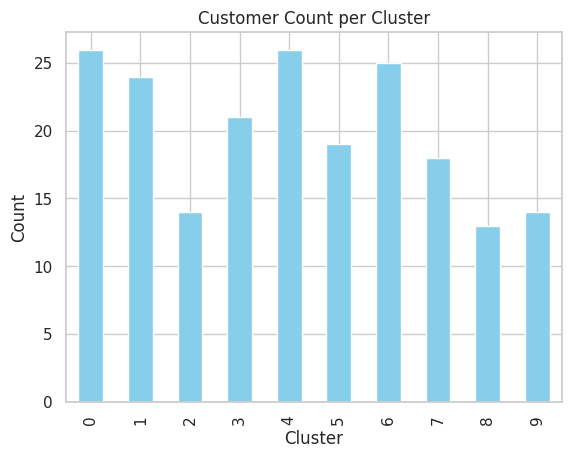

In [35]:
cluster_profile = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profile['Count'] = df['Cluster'].value_counts().sort_index().values
cluster_profile['Percentage'] = round(100 * cluster_profile['Count'] / len(df), 1)
print("Cluster Profiles:\n")
display(cluster_profile)

# Bar plot of cluster sizes
cluster_profile['Count'].plot(kind='bar', color='skyblue')
plt.title("Customer Count per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


Step 10. Export Clustered Data

In [36]:
# Save the new dataset with cluster labels
df.to_csv("Mall_Customers_with_clusters.csv", index=False)
print("✅ Clustered dataset saved as 'Mall_Customers_with_clusters.csv'")


✅ Clustered dataset saved as 'Mall_Customers_with_clusters.csv'


Step 12. Generate Final Insights

In [37]:
print("✅ Project completed successfully!")

print("""
Next Steps:
1. Add cluster personas and recommendations.
2. Export insights to README or Power BI dashboard.
3. Share findings with marketing or analytics team.
""")


✅ Project completed successfully!

Next Steps:
1. Add cluster personas and recommendations.
2. Export insights to README or Power BI dashboard.
3. Share findings with marketing or analytics team.



In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset (uploaded or in your Colab Files)
df = pd.read_csv("Mall_Customers.csv")

# Encode Gender if available
if 'Gender' in df.columns:
    df['Gender_enc'] = LabelEncoder().fit_transform(df['Gender'])
else:
    df['Gender_enc'] = 0

# Select features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_enc']
X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find best k using silhouette
sil_scores = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

best_k = K[np.argmax(sil_scores)]
print("✅ Best k =", best_k)

# Final KMeans with best_k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# ---- SAVE BOTH FILES ----
df.to_csv("Mall_Customers_with_clusters.csv", index=False)

profile = df.groupby('cluster')[features].mean().round(3).reset_index()
profile.to_csv("cluster_profiles.csv", index=False)

print("✅ Files saved successfully:")
print("Mall_Customers_with_clusters.csv")
print("cluster_profiles.csv")


✅ Best k = 10
✅ Files saved successfully:
Mall_Customers_with_clusters.csv
cluster_profiles.csv


In [39]:
from google.colab import files
files.download("Mall_Customers_with_clusters.csv")
files.download("cluster_profiles.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>